## Introduction to ML 

In [1]:
# Python ML - Project 2 - Supervised Learning - Classification
# Steve Iannucci and Nate Powers

import numpy as np
import pandas as pd
import matplotlib

In [2]:
health = pd.read_csv("C:/Users/natea/Desktop/L&F/School/Spring 2020/Python ML/Projects/Proj_2/Classification/survey.csv")
health.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [3]:
# Filter out if users dont work in tech
health = health[health["tech_company"] != "No"]
health.hist(column = 'Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203BB3DD8C8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203BBE84F88>]],
      dtype=object)

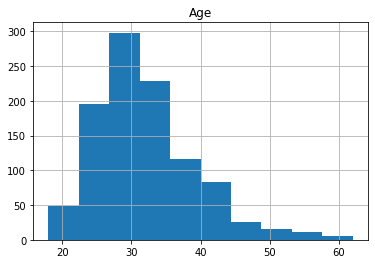

In [4]:
# remove all entries with age over 100 and less than 16
health = health[health['Age'] > 16]
health = health[health['Age'] < 100]
health.hist(column = 'Age')

**Timestamp** - Time the survey was submitted

**Age** - Respondent age Gender-Respondent gender 

**Country** - Respondent country state-If you live in the United States, which state or territory do you live in?

**self_employed** - Are you self-employed?

**family_history** - Do you have a family history of mental illness?

**treatment** - Have you sought treatment for a mental health condition? 

**work_interfere** - If you have a mental health condition, do you feel that it interferes with your work? 

**no_employees** - How many employees does your company or organization have? 

**remote_work** - Do you work remotely (outside of an office) at least 50% of the time? 

**tech_company** - Is your employer primarily a tech company/organization? 

**benefits** - Does your employer provide mental health benefits? 

**care_options** - Do you know the options for mental health care your employer provides? 

**wellness_program** - Has your employer ever discussed mental health as part of an employee wellness program? 

**seek_help** - Does your employer provide resources to learn more about mental health issues and how to seek help? 

**anonymity** - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? 

**leave** - How easy is it for you to take medical leave for a mental health condition? 

**mental_health_consequence** - Do you think that discussing a mental health issue with your employer would have negative consequences? 

**phys_health_consequence** - Do you think that discussing a physical health issue with your employer would have negative consequences? 

**coworkers** - Would you be willing to discuss a mental health issue with your coworkers? 

**supervisor** - Would you be willing to discuss a mental health issue with your direct supervisor(s)? 

**mental_health_interview** - Would you bring up a mental health issue with a potential employer in an interview? 

**phys_health_interview** - Would you bring up a physical health issue with a potential employer in an interview? 

**mental_vs_physical** - Do you feel that your employer takes mental health as seriously as physical health? 

**obs_consequence** - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? 

**comments** - Any additional notes or comments

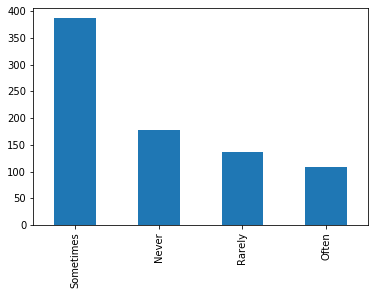

In [5]:
health['work_interfere'].value_counts().plot(kind='bar')

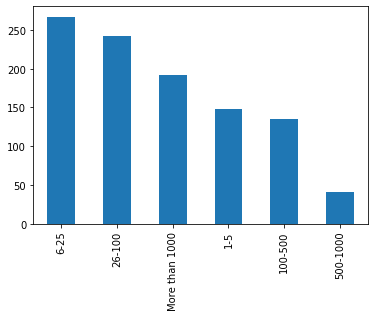

In [6]:
health['no_employees'].value_counts().plot(kind='bar')

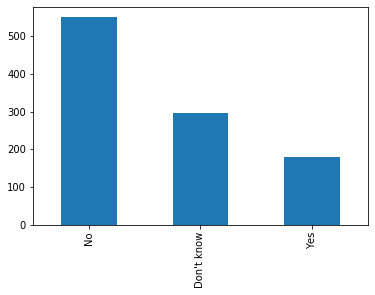

In [7]:
health['seek_help'].value_counts().plot(kind='bar')

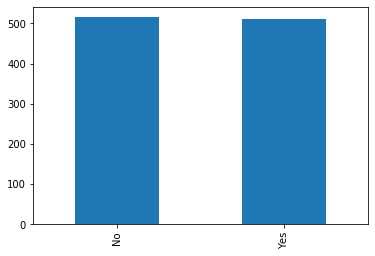

In [8]:
health['treatment'].value_counts().plot(kind='bar')

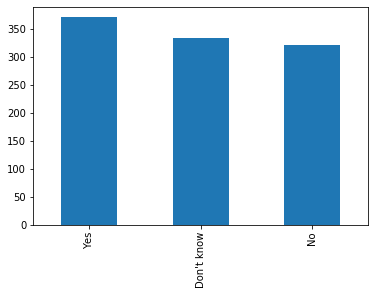

In [9]:
health['benefits'].value_counts().plot(kind='bar')

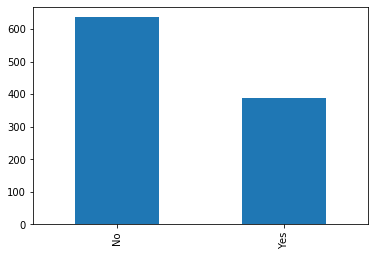

In [10]:
health['family_history'].value_counts().plot(kind='bar')

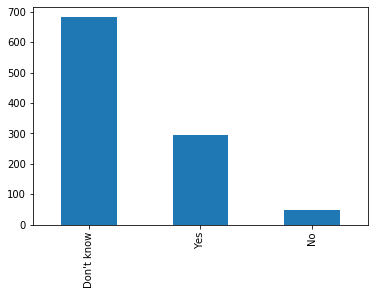

In [11]:
health['anonymity'].value_counts().plot(kind='bar')

In [12]:
# put age into 5 bins
conds = [
    (health['Age'] <= 25),
    (health['Age'] <= 35) & (health['Age'] > 25),
    (health['Age'] <= 45) & (health['Age'] > 35),
    (health['Age'] <= 55) & (health['Age'] > 45),
    (health['Age'] <= 65) & (health['Age'] > 55),
    (health['Age'] > 65)
]
choices = ['under 25','25-35','35-45','45-55','55-65','over 65']
ages = np.select(conds,choices, default = 'Problem')
print(ages)

['35-45' '25-35' '25-35' ... '25-35' '25-35' '45-55']


In [13]:
## Convert strings (categorical) to numerical data
## Do we need to put age into bins??

survey = health[['treatment','no_employees','benefits','family_history','seek_help','work_interfere','anonymity']]
survey['age'] = pd.DataFrame(data=ages.flatten())
survey = survey.dropna()
survey = survey.reset_index(drop=True)
survey.head(20)

C:\Users\siannuc\Downloads\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,treatment,no_employees,benefits,family_history,seek_help,work_interfere,anonymity,age
0,Yes,6-25,Yes,No,Yes,Often,Yes,35-45
1,No,6-25,No,No,No,Rarely,Don't know,25-35
2,Yes,26-100,No,Yes,No,Often,No,25-35
3,No,100-500,Yes,No,Don't know,Never,Don't know,25-35
4,No,6-25,Yes,Yes,Don't know,Sometimes,Don't know,25-35
5,Yes,1-5,No,Yes,No,Sometimes,No,35-45
6,No,1-5,No,No,No,Never,Yes,35-45
7,Yes,100-500,Yes,Yes,No,Sometimes,No,under 25
8,No,26-100,Don't know,No,Don't know,Never,Don't know,25-35
9,Yes,6-25,Don't know,No,No,Sometimes,Don't know,25-35


In [14]:
# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

cat = [['No', 'Yes'],['1-5', '6-25', '26-100','100-500','500-1000', 'More than 1000'],["Don't know", 'No', 'Yes'],['No', 'Yes'],["Don't know", 'No', 'Yes'],['Never', 'Rarely', 'Sometimes', 'Often'],["Don't know", 'No', 'Yes'],['under 25','25-35','35-45','45-55','55-65','over 65']]
ordenc = OrdinalEncoder(categories = cat)
surveyE = ordenc.fit_transform(survey)
print(ordenc.categories_)
print(surveyE)

[array(['No', 'Yes'], dtype=object), array(['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
      dtype=object), array(["Don't know", 'No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(["Don't know", 'No', 'Yes'], dtype=object), array(['Never', 'Rarely', 'Sometimes', 'Often'], dtype=object), array(["Don't know", 'No', 'Yes'], dtype=object), array(['under 25', '25-35', '35-45', '45-55', '55-65', 'over 65'],
      dtype=object)]
[[1. 1. 2. ... 3. 2. 2.]
 [0. 1. 1. ... 1. 0. 1.]
 [1. 2. 1. ... 3. 1. 1.]
 ...
 [0. 2. 0. ... 0. 0. 1.]
 [0. 1. 2. ... 0. 0. 1.]
 [0. 2. 0. ... 2. 0. 3.]]


In [15]:
# Import and split data
from sklearn.model_selection import train_test_split
# treatment is our y variable
x_train, x_test, y_train, y_test = train_test_split(surveyE[:,1:],surveyE[:,0], test_size = .5, random_state = 3)


In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X = x_train,y = y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.75


In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.69


In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.74


In [19]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

cm = plt.cm.get_cmap('jet')

rval = np.empty([10*19,1])
kval = np.empty([10*19,1])
nval = np.empty([10*19,1])
i = 0

for r in np.linspace(0.05,0.95,19):
    r = .2
    x_train, x_test, y_train, y_test = train_test_split(surveyE[:,1:],surveyE[:,0], test_size = r, random_state = 3)
    print(r)      
        
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X = x_train,y = y_train)
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

    clf = DecisionTreeClassifier().fit(x_train, y_train)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(x_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

    #kval[i] = knn.score(x_test,y_test)
    #nval[i] = k
    #rval[i] = r
    #plt.scatter(r,k,c = knn.score(x_test,y_test), vmin = 0, vmax = 1, cmap = cm)
    #plt.scatter(r, clf.score(x_test,y_test),c = 'blue', label = 'clf', zorder = 3)
    #plt.scatter(r, logreg.score(x_test,y_test), c= 'red', label = 'logreg', zorder = 3)

    i += 1
#plt.figure(figsize=(6,6))
#sc = plt.scatter(rval,nval, c= kval, vmin = min(kval), vmax = 1, cmap = cm)
#plt.colorbar(sc)
#ax = plt.gca()
#ax.grid(which = 'major',axis = 'both',zorder = 0, lw = .25)
#plt.xlabel('Ratio of Train to Test Size')
#plt.ylabel('Number of Neighbors')
#plt.legend(['clf','logreg'],bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
#plt.show()

        

0.2
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.77
Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on test set: 0.70
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.81
0.2
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.77
Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on test set: 0.71
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.81
0.2
Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.77
Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on test set: 0.70
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifie

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
y = surveyE[:,0]
# predictions

k_pred = knn.predict(surveyE[:,1:])
l_pred = logreg.predict(surveyE[:,1:])
c_pred = clf.predict(surveyE[:,1:])

kmse = mean_squared_error(k_pred,y)
lmse = mean_squared_error(l_pred,y)
cmse = mean_squared_error(c_pred,y)

kcon = confusion_matrix(y,k_pred)
lcon = confusion_matrix(y,l_pred)
ccon = confusion_matrix(y,c_pred)

print(kcon)
print(lcon)
print(ccon)

[[162  92]
 [ 43 360]]
[[166  88]
 [ 52 351]]
[[225  29]
 [ 55 348]]


Text(0.5, 1.0, 'knn')

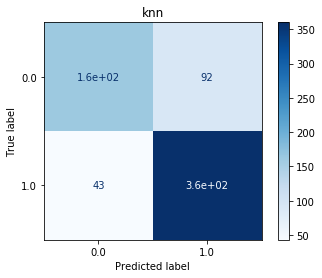

In [26]:
from sklearn.metrics import plot_confusion_matrix as pcm

disp = pcm( knn , surveyE[:,1:], y_true = y, cmap = plt.cm.Blues )
disp.ax_.set_title('knn')

Text(0.5, 1.0, 'clf')

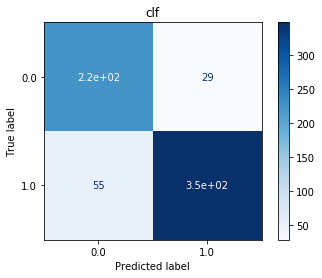

In [27]:
disp = pcm( clf , surveyE[:,1:], y_true = y, cmap = plt.cm.Blues )
disp.ax_.set_title('clf')

Text(0.5, 1.0, 'logreg')

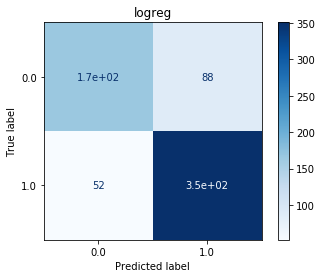

In [28]:
disp = pcm( logreg , surveyE[:,1:], y_true = y, cmap = plt.cm.Blues )
disp.ax_.set_title('logreg')